# Import Libiraries

In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Load the Dataset

In [50]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [51]:
X_train[0]

array([37., 39., 25., ..., 58., 54., 29.])

## Process the data

In [52]:
print(X_train[0].shape)
print(len(X_train))

(30000,)
2000


In [34]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(X_train),1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train=X_train/255.0
X_test=X_test/255.0

In [35]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


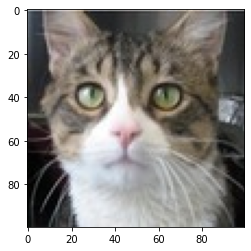

In [36]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [41]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [42]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [43]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 13s 381ms/step - loss: 0.7137 - accuracy: 0.5195
Epoch 2/5
32/32 [==============================] - 14s 448ms/step - loss: 0.6643 - accuracy: 0.6225
Epoch 3/5
32/32 [==============================] - 13s 400ms/step - loss: 0.6039 - accuracy: 0.6745
Epoch 4/5
32/32 [==============================] - 15s 463ms/step - loss: 0.5352 - accuracy: 0.7420
Epoch 5/5
32/32 [==============================] - 18s 575ms/step - loss: 0.4619 - accuracy: 0.7865


In [44]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 71ms/step - loss: 0.6293 - accuracy: 0.6800


[0.6292831301689148, 0.6800000071525574]

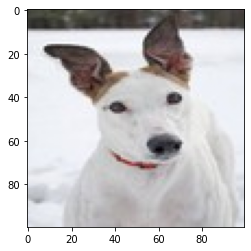

1/1 [==============================] - 0s 93ms/step
Our model says it is a : dog


In [45]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)